#### Assignment 2


##### Question 5

The package "pyIAST" was used to obtain the binary-mixture isotherms by the linear interpolation method for a pressure range from 0.1 to 4.0 bar with increments of 0.2 bar. The needed code and the corresponding graph are shown below.

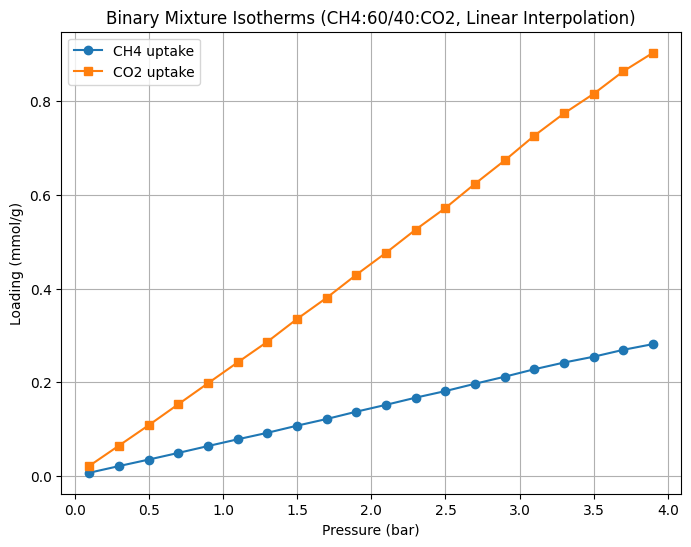

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd


# We load the data from CSV files
df_ch4 = pd.read_csv("CH4_IRMOF1.csv")
df_co2 = pd.read_csv("CO2_IRMOF1.csv")

# Create Isotherm objects using interpolation
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)",
                                    fill_value=df_ch4['Loading(mmol/g)'].max())

co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)",
                                    fill_value=df_ch4['Loading(mmol/g)'].max())

#We define the mixturew as containing 60% of methane and 40% of carbon dioxide
mole_fraction = np.array([0.6, 0.4])

# Pressure range 0.1 to 4.0 with 0.2 increments
P_range = np.arange(0.1, 4.0, 0.2)

# we perform an IAST calculation for each pressure point
loadings_gas1 = []
loadings_gas2 = []

for P in P_range:
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )
    loadings_gas1.append(result[0])
    loadings_gas2.append(result[1])

# --- Plot results ---
plt.figure(figsize=(8,6))
plt.plot(P_range, loadings_gas1, 'o-', label='CH4 uptake')
plt.plot(P_range, loadings_gas2, 's-', label='CO2 uptake')
plt.xlabel("Pressure (bar)")
plt.ylabel("Loading (mmol/g)")
plt.title("Binary Mixture Isotherms (CH4:60/40:CO2, Linear Interpolation)")
plt.legend()
plt.grid(True)
plt.show()


##### Question 6

The selectivity of $CO_2$ over $CH_4$ was calculated at 0.1, 1, 2 and 3 bars and 300 K using the following equation:

$$S_{CO_2/CH_4}=\frac{q_{CO_2}}{q_{CH_4}}\frac{y_{CH_4}}{y_{CO_2}} $$

Where $y_{CH_4}$ and $y_{CO_2}$ are fixed values here equal to, respectively, 0.6 and 0.4. On the other hand, $q_{CH_4}$ and $q_{CO_2}$ are the binary loading at the adsorption conditions in mmol/g obtained from the IAST calculations shown below.

In [ ]:
P_range = np.array([0.1, 1.0, 2.0, 3.0])

for P in P_range:
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )

    # Selectivity calculation
    S_co2_ch4 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])
    print(f"Selectivity of CO2 over CH4 at P={P} bar is equal to {S_co2_ch4:.4f}\n")


Selectivity of CO2 over CH4 at P=0.1 bar: S_CO2/CH4 = 4.8695

Selectivity of CO2 over CH4 at P=1.0 bar: S_CO2/CH4 = 4.6796

Selectivity of CO2 over CH4 at P=2.0 bar: S_CO2/CH4 = 4.6838

Selectivity of CO2 over CH4 at P=3.0 bar: S_CO2/CH4 = 4.7100



##### Question 7

To prove that if the molar fraction of $CO_2$ drops to 0.2, the selectivity doesn't change we will perform the calculations again with the modified ratio. 

In [44]:
for P in P_range:
    #the selectivity is calculated at different molar fractions
    mole_fraction=np.array([0.6, 0.4])
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )
    S_co2_40_ch4_60 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])

    mole_fraction=np.array([0.8, 0.2])
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )
    S_co2_20_ch4_80 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])

    #the results are printed
    print(f"Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to {S_co2_40_ch4_60:.4f}\nSelectivity of CO2 over CH4 when 20% of CO2 is present is equal to {S_co2_20_ch4_80:.4f}\n")

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.7982
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.8695

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.6550
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.6796

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.7037
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.6838

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.7791
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.7100



In order to test if selectivity is a fnuction of time is measure two new isotherms with an arbitrary ratio of $CH_4$ and $CO_2$ at a different themperature, obtain the binary-mixture isotherms by linear interpolation and then recalculate the selectivity at the same pressures to comparate the results.

##### Question 8

